# Task 1 - Prediction using Decision Tree Algorithm
# Linu Roby


In [10]:
# Importing required libraries
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
# Load the provided dataset in csv
dataset = pd.read_csv("Iris.csv")
print("Total number of samples : ",len(dataset))
# View a few rows from the dataset
dataset.head(10)

Total number of samples :  150


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Exploratory Data Analysis

In [3]:
# Check for any null values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

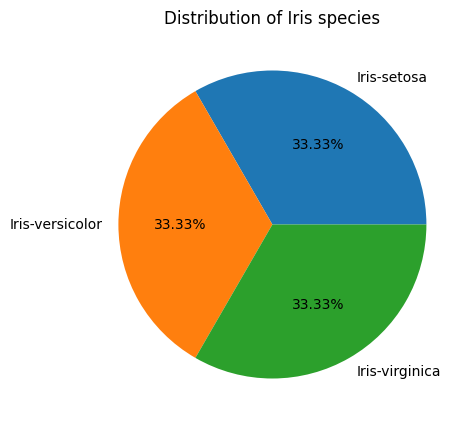

In [9]:
# View distribution of each species in a pie chart
dataset['Species'].value_counts()
x_label = dataset['Species'].value_counts().index
y_label = dataset['Species'].value_counts().values
plt.figure(figsize=(5,5))
plt.pie(y_label,labels=x_label,autopct='%0.2f%%')
plt.title("Distribution of Iris species")
plt.show()

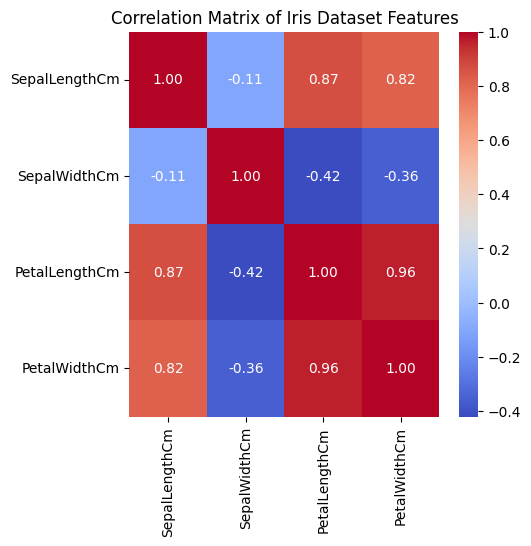

In [13]:
# Check the correlation between features
corr_df = dataset.drop(columns=['Id','Species'])
corr_matrix = corr_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

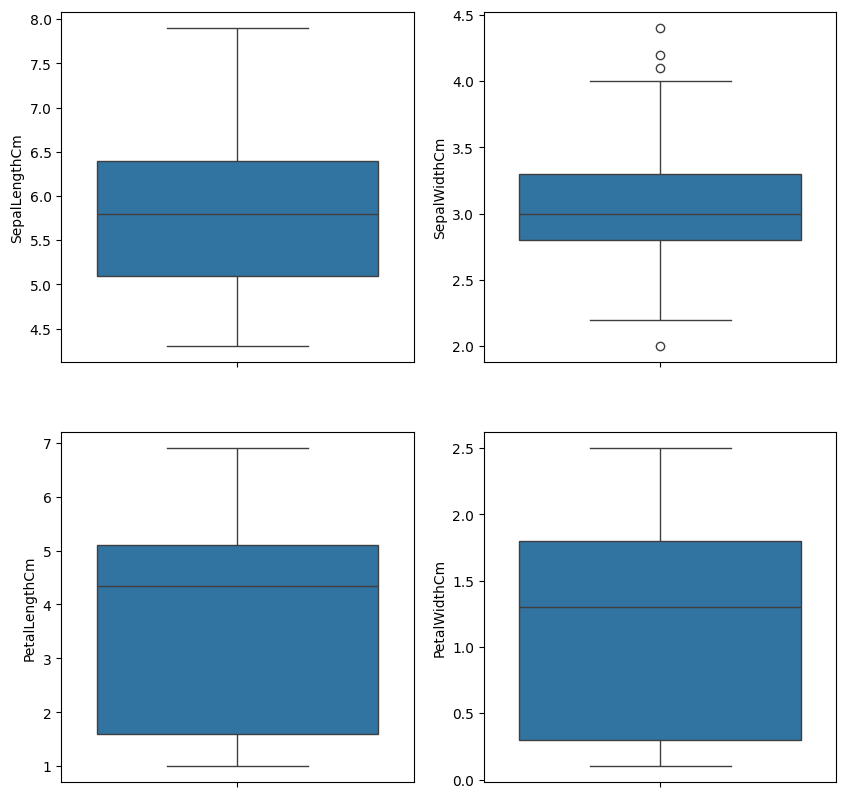

In [24]:
plt.figure(figsize=(10,10))

for i, column in enumerate(corr_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=corr_df[column])
plt.show()

In [14]:
# Id column is not required for training
dataset.drop(columns=['Id'],inplace=True)
dataset.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [15]:
# Last column 'Species' is the target variable. Drop this and retain features for x list
x_data = dataset.drop('Species',axis=1)
# Create y list with target variable
y_data = dataset['Species']


In [16]:
print("Features:\n",x_data.head(1),"\nTarget\n",y_data.head(1))

Features:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2 
Target
 0    Iris-setosa
Name: Species, dtype: object


In [17]:
# Split into train and test data (80-20)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print("No: of training samples :",len(x_train))
print("No: of testing samples :",len(x_test))

No: of training samples : 120
No: of testing samples : 30


In [18]:
# Decision Tree Classifier
iris_decision = DecisionTreeClassifier()
# Fit with train data
iris_decision.fit(x_train,y_train)
print("Training completed using Decision Tree Classifier")

Training completed using Decision Tree Classifier


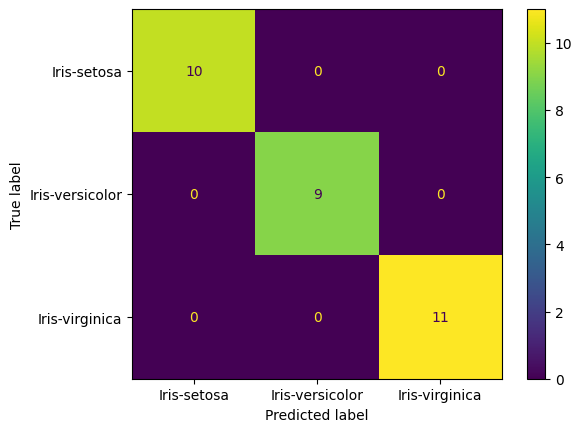

In [19]:
# Test prediction using test data
predicted_species = iris_decision.predict(x_test)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test,predicted_species)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris_decision.classes_)
display_confusion.plot()

In [20]:
# Print the accuracy of the model
print("Accuracy of the decision tree classifier : ",accuracy_score(y_test,predicted_species)*100,"%")

Accuracy of the decision tree classifier :  100.0 %


# All test instances are correctly classified